In [161]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [141]:
df1 = pd.read_csv('/Users/chaileg/Downloads/Masters-Dissertation-Project/37-00027_UOF-P_2014-2016_prepped.csv')
df2 = pd.read_csv('/Users/chaileg/Downloads/ACS_15_5YR_S1903_with_ann.csv')

policing_data = pd.concat([df1, df2])

policing_data.head()

,RIN,PRIMARY_KEY,INCIDENT_DATE,LOCATION_DISTRICT,INCIDENT_REASON,REASON_FOR_FORCE,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,SUBJECT_ROLE,SUBJECT_DESCRIPTION,REASON_FOR_FORCE.1,TYPE_OF_FORCE_USED1,TYPE_OF_FORCE_USED2,TYPE_OF_FORCE_USED3,TYPE_OF_FORCE_USED4,NUMBER_EC_CYCLES,SUBJECT_INJURY_TYPE,OFFICER_INJURY_TYPE,Unnamed: 19,OFFICER_YEARS_ON_FORCE,Y_COORDINATE,Y_COORDINATE.1,LOCATION_DISTRICT.1,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_CITY,LOCATION_STATE,LOCATION_LATITUDE,LOCATION_LONGITUDE,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC02,HC01_MOE_VC02,HC02_EST_VC02,HC02_MOE_VC02,HC01_EST_VC04,HC01_MOE_VC04,HC02_EST_VC04,HC02_MOE_VC04,HC01_EST_VC05,HC01_MOE_VC05,HC02_EST_VC05,HC02_MOE_VC05,HC01_EST_VC06,HC01_MOE_VC06,HC02_EST_VC06,HC02_MOE_VC06,HC01_EST_VC07,HC01_MOE_VC07,HC02_EST_VC07,HC02_MOE_VC07,HC01_EST_VC08,HC01_MOE_VC08,HC02_EST_VC08,HC02_MOE_VC08,HC01_EST_VC09,HC01_MOE_VC09,HC02_EST_VC09,HC02_MOE_VC09,HC01_EST_VC10,HC01_MOE_VC10,HC02_EST_VC10,HC02_MOE_VC10,HC01_EST_VC12,HC01_MOE_VC12,HC02_EST_VC12,HC02_MOE_VC12,HC01_EST_VC13,HC01_MOE_VC13,HC02_EST_VC13,HC02_MOE_VC13,HC01_EST_VC16,HC01_MOE_VC16,HC02_EST_VC16,HC02_MOE_VC16,HC01_EST_VC17,HC01_MOE_VC17,HC02_EST_VC17,HC02_MOE_VC17,HC01_EST_VC18,HC01_MOE_VC18,HC02_EST_VC18,HC02_MOE_VC18,HC01_EST_VC19,HC01_MOE_VC19,HC02_EST_VC19,HC02_MOE_VC19,HC01_EST_VC22,HC01_MOE_VC22,HC02_EST_VC22,HC02_MOE_VC22,HC01_EST_VC23,HC01_MOE_VC23,HC02_EST_VC23,HC02_MOE_VC23,HC01_EST_VC24,HC01_MOE_VC24,HC02_EST_VC24,HC02_MOE_VC24,HC01_EST_VC25,HC01_MOE_VC25,HC02_EST_VC25,HC02_MOE_VC25,HC01_EST_VC26,HC01_MOE_VC26,HC02_EST_VC26,HC02_MOE_VC26,HC01_EST_VC27,HC01_MOE_VC27,HC02_EST_VC27,HC02_MOE_VC27,HC01_EST_VC30,HC01_MOE_VC30,HC02_EST_VC30,HC02_MOE_VC30,HC01_EST_VC31,HC01_MOE_VC31,HC02_EST_VC31,HC02_MOE_VC31,HC01_EST_VC32,HC01_MOE_VC32,HC02_EST_VC32,HC02_MOE_VC32,HC01_EST_VC33,HC01_MOE_VC33,HC02_EST_VC33,HC02_MOE_VC33,HC01_EST_VC34,HC01_MOE_VC34,HC02_EST_VC34,HC02_MOE_VC34,HC01_EST_VC35,HC01_MOE_VC35,HC02_EST_VC35,HC02_MOE_VC35,HC01_EST_VC36,HC01_MOE_VC36,HC02_EST_VC36,HC02_MOE_VC36,HC01_EST_VC39,HC01_MOE_VC39,HC02_EST_VC39,HC02_MOE_VC39,HC01_EST_VC40,HC01_MOE_VC40,HC02_EST_VC40,HC02_MOE_VC40,HC01_EST_VC41,HC01_MOE_VC41,HC02_EST_VC41,HC02_MOE_VC41
0,RIN,Primary Key,Date Occurred,Area Command,Nature of Contact,Reason Desc,Master Subject ID,Subject Sex,Race,Subject Role,Subject Conduct Desc,Subject Resistance,Weapon Used 1,Weapon Used 2,Weapon Used 3,Weapon Used 4,Number Shots,Subject Effects,Effect on Officer,Officer Organization Desc,Officer Yrs of Service,X-Coordinate,Y-Coordinate,City Council District,Geolocation,City,State,Latitude,Longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,156701,2015541517,2/24/2015,FR,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,167510327: 2015541517,M,Hispanic,NaN,SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS,EMPTY HAND DEFENSIVE RESISTANCE,WEAPONLESS (PRESSURE POINTS/KICKS/HAND),NaN,NaN,NaN,NaN,NO COMPLAINT OF INJURY/PAIN,NO COMPLAINT OF INJURY/PAIN,CRIMINAL INTERDICTION / K9,3,3100341,10030899,5,9900 BLOCK S IH 35 SB,Austin,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [142]:
policing_data.isna().sum()
selected_columns = ["SUBJECT_RACE", "HC02_EST_VC04", "HC02_EST_VC05", "HC02_EST_VC12", "INCIDENT_REASON", "SUBJECT_ROLE", "Y_COORDINATE", "Y_COORDINATE.1"]
police_data = policing_data[selected_columns]
print(police_data["SUBJECT_ROLE"].value_counts())
police_data.describe().T

label_encoder = LabelEncoder()
police_data["SUBJECT_ROLE"] = label_encoder.fit_transform(police_data["SUBJECT_ROLE"]) + 1
X = police_data[["HC02_EST_VC04", "HC02_EST_VC05", "HC02_EST_VC12", "INCIDENT_REASON", "SUBJECT_RACE", "Y_COORDINATE", "Y_COORDINATE.1"]]
y = police_data["SUBJECT_ROLE"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

SUBJECT_ROLE
ARRESTED        2066
JUV-ARRESTE      178
COMMITTED        141
VICTIM/ARRE      126
SUBJECT          126
                ... 
JUV-SUMMONS        1
Subject Role       1
REC-RUN/MP         1
JUV-PASSENG        1
JUV-VIC/ARR        1
Name: count, Length: 24, dtype: int64


/var/folders/hz/lrpvc02j4h9dcry2sftm13tw0000gn/T/ipykernel_5792/783342707.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police_data["SUBJECT_ROLE"] = label_encoder.fit_transform(police_data["SUBJECT_ROLE"]) + 1


In [191]:
selected_columns = ["SUBJECT_ROLE", "SUBJECT_RACE", "HC02_EST_VC04", "HC02_EST_VC05", "HC02_EST_VC12", "HC02_EST_VC07", "HC02_EST_VC22", "INCIDENT_REASON", "Y_COORDINATE", "Y_COORDINATE.1"]
police_data = policing_data[selected_columns]
police_data.head()

,SUBJECT_ROLE,SUBJECT_RACE,HC02_EST_VC04,HC02_EST_VC05,HC02_EST_VC12,HC02_EST_VC07,HC02_EST_VC22,INCIDENT_REASON,Y_COORDINATE,Y_COORDINATE.1
0,Subject Role,Race,NaN,NaN,NaN,NaN,NaN,Nature of Contact,X-Coordinate,Y-Coordinate
1,NaN,Hispanic,NaN,NaN,NaN,NaN,NaN,VIEWED OFFENSE,3100341,10030899
2,NaN,Hispanic,NaN,NaN,NaN,NaN,NaN,VIEWED OFFENSE,3115535,10070296
3,NaN,Hispanic,NaN,NaN,NaN,NaN,NaN,VIEWED OFFENSE,3115535,10070296
4,SUSPECT,Black,NaN,NaN,NaN,NaN,NaN,TRAFFIC STOP,3117503,10057313


In [193]:
police_data["SUBJECT_RACE"] = pd.to_numeric(police_data["SUBJECT_RACE"], errors='coerce')
police_data["HC02_EST_VC04"] = pd.to_numeric(police_data["HC02_EST_VC04"], errors='coerce')
police_data["HC02_EST_VC05"] = pd.to_numeric(police_data["HC02_EST_VC05"], errors='coerce')
police_data["HC02_EST_VC12"] = pd.to_numeric(police_data["HC02_EST_VC12"], errors='coerce')
police_data["HC02_EST_VC07"] = pd.to_numeric(police_data["HC02_EST_VC07"], errors='coerce')
police_data["HC02_EST_VC22"] = pd.to_numeric(police_data["HC02_EST_VC22"], errors='coerce')
police_data["INCIDENT_REASON"] = pd.to_numeric(police_data["INCIDENT_REASON"], errors='coerce')

police_data.head()# Remove rows where column 'B' contains the string 'cat'

police_data.head()

/var/folders/hz/lrpvc02j4h9dcry2sftm13tw0000gn/T/ipykernel_5792/1646913337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police_data["SUBJECT_RACE"] = pd.to_numeric(police_data["SUBJECT_RACE"], errors='coerce')
/var/folders/hz/lrpvc02j4h9dcry2sftm13tw0000gn/T/ipykernel_5792/1646913337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police_data["HC02_EST_VC04"] = pd.to_numeric(police_data["HC02_EST_VC04"], errors='coerce')
/var/folders/hz/lrpvc02j4h9dcry2sftm13tw0000gn/T/ipykernel_5792/1646913337.p

,SUBJECT_ROLE,SUBJECT_RACE,HC02_EST_VC04,HC02_EST_VC05,HC02_EST_VC12,HC02_EST_VC07,HC02_EST_VC22,INCIDENT_REASON,Y_COORDINATE,Y_COORDINATE.1
0,Subject Role,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X-Coordinate,Y-Coordinate
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3100341,10030899
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3115535,10070296
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3115535,10070296
4,SUSPECT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3117503,10057313


In [194]:
police_data = police_data.drop(index=0).reset_index(drop=True)
print(police_data)

     SUBJECT_ROLE  SUBJECT_RACE  HC02_EST_VC04  HC02_EST_VC05  HC02_EST_VC12  \
0             NaN           NaN            NaN            NaN            NaN   
1             NaN           NaN            NaN            NaN            NaN   
2             NaN           NaN            NaN            NaN            NaN   
3         SUSPECT           NaN            NaN            NaN            NaN   
4             NaN           NaN            NaN            NaN            NaN   
...           ...           ...            ...            ...            ...   
9875          NaN           NaN       101018.0            NaN       104706.0   
9876          NaN           NaN        78068.0            NaN        53281.0   
9877          NaN           NaN        69741.0        92143.0        13538.0   
9878          NaN           NaN        86544.0            NaN            NaN   
9879          NaN           NaN            NaN            NaN            NaN   

      HC02_EST_VC07  HC02_EST_VC22  INC

Text(0.5, 1.0, 'White')

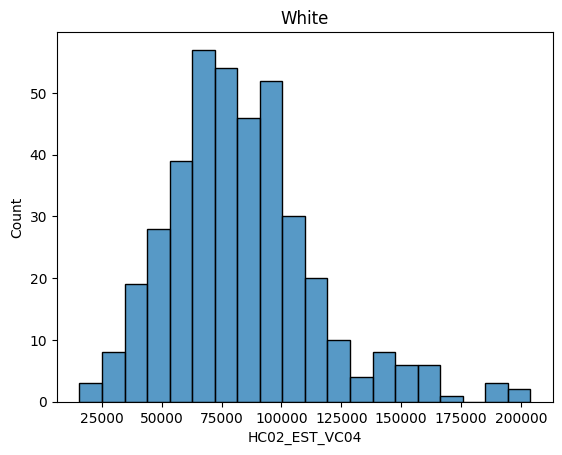

In [185]:
sns.histplot(police_data['HC02_EST_VC04'])
plt.title("White")

Text(0.5, 1.0, 'Black or African American')

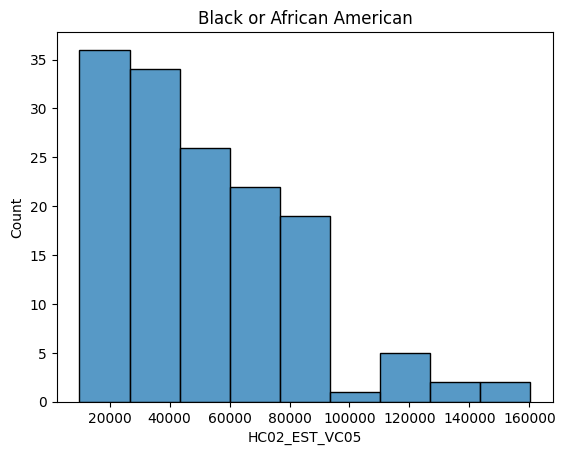

In [186]:
sns.histplot(police_data['HC02_EST_VC05'])
plt.title("Black or African American")

Text(0.5, 1.0, 'Latino')

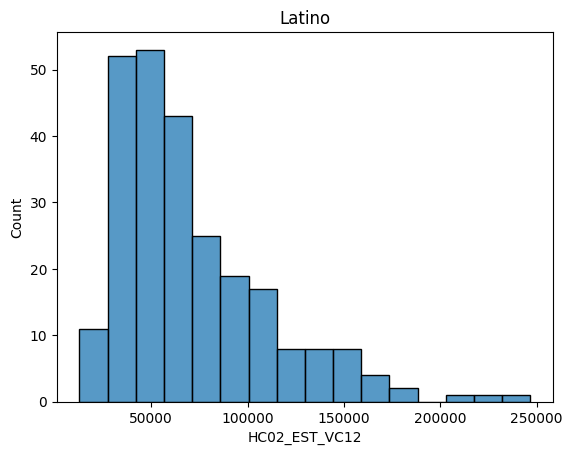

In [187]:
sns.histplot(police_data['HC02_EST_VC12'])
plt.title("Latino")

Text(0.5, 1.0, 'Asian')

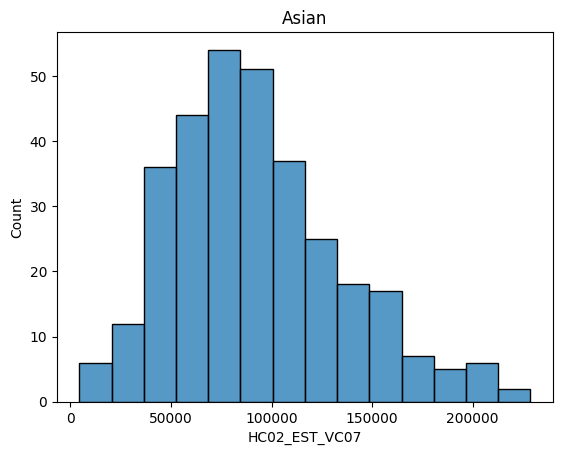

In [190]:
sns.histplot(police_data['HC02_EST_VC07'])
plt.title("Asian")

Text(0.5, 1.0, 'Houshold Income')

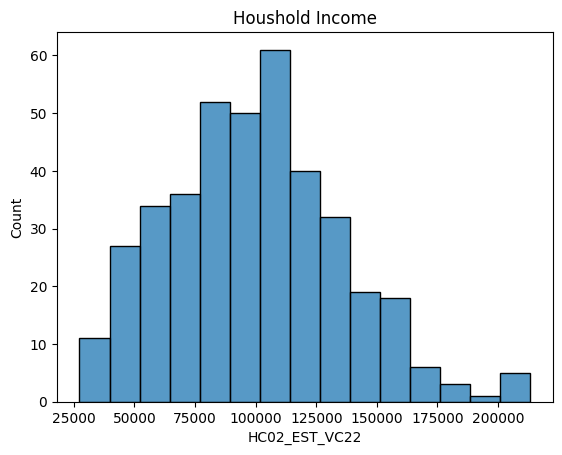

In [195]:
sns.histplot(police_data['HC02_EST_VC22'])
plt.title("Houshold Income")

Text(0.5, 1.0, 'House Hold Income on White People')

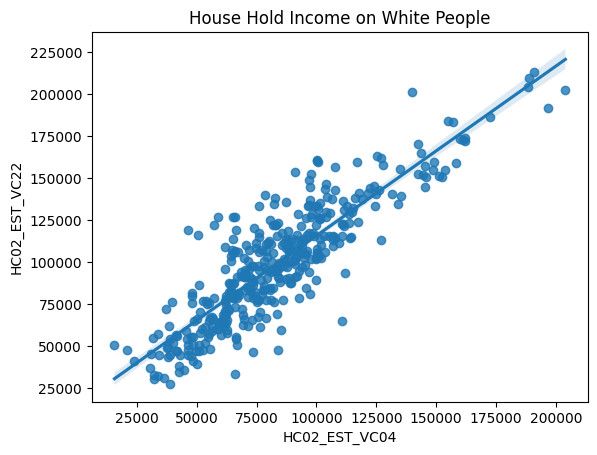

In [215]:
sns.regplot(x=police_data['HC02_EST_VC04'], y=police_data['HC02_EST_VC22'])
plt.title("House Hold Income on White People")

Text(0.5, 1.0, 'House Hold Income on Black or African American')

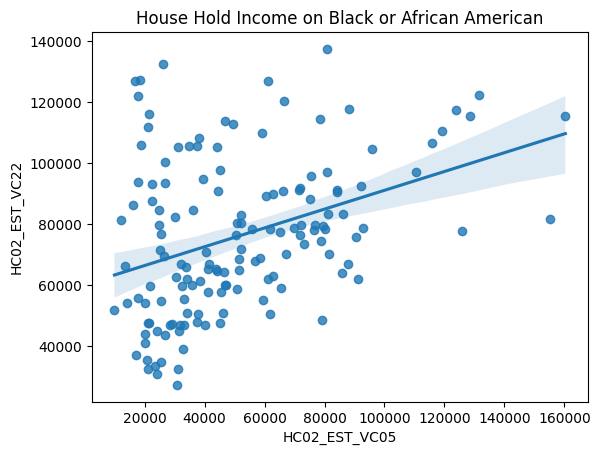

In [216]:
sns.regplot(x=police_data['HC02_EST_VC05'], y=police_data['HC02_EST_VC22'])
plt.title("House Hold Income on Black or African American")

Text(0.5, 1.0, 'House Hold Income on Latino')

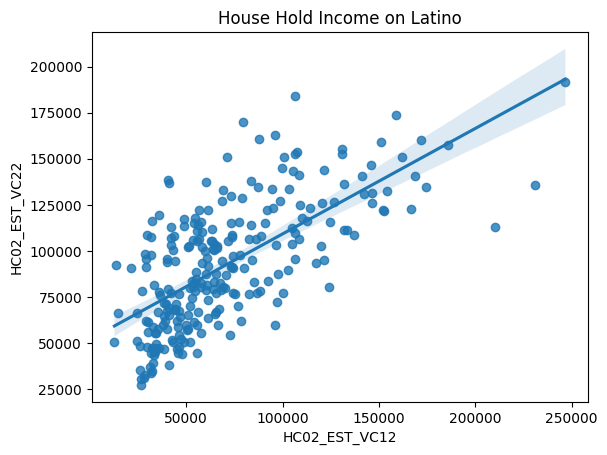

In [217]:
sns.regplot(x=police_data['HC02_EST_VC12'], y=police_data['HC02_EST_VC22'])
plt.title("House Hold Income on Latino")

Text(0.5, 1.0, 'House Hold Income on Asian')

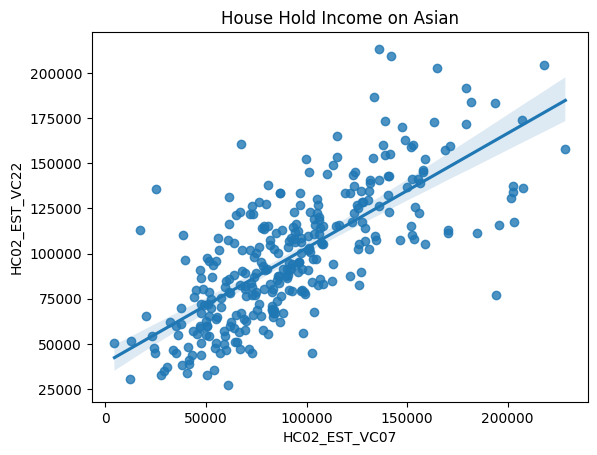

In [221]:
sns.regplot(x=police_data['HC02_EST_VC07'], y=police_data['HC02_EST_VC22'])
plt.title("House Hold Income on Asian")

Text(0.5, 1.0, 'Correlation with Conviction')

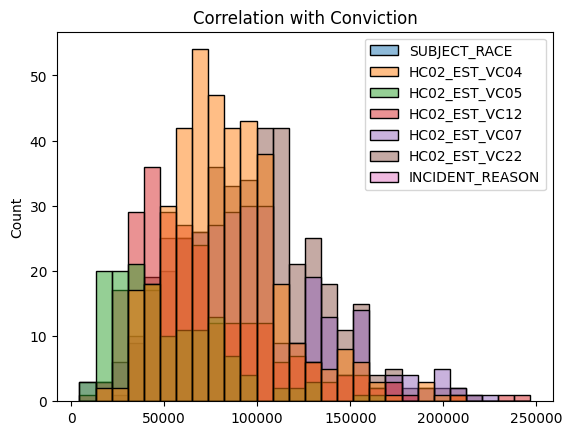

In [242]:
sns.histplot(data=police_data)
plt.title("Correlation with Conviction")

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X = police_data.drop('target_variable', axis=1)
y = police_data['target_variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [243]:
    from xgboost import XGBRegressor
    import numpy as np

    X_train = np.random.rand(100, 5) 
    y_train = np.random.rand(100) 
    # Initialize XGBRegressor
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

    # Fit the model
    xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [244]:
X = pd.get_dummies(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict binary values (0 or 1)
y_pred_binary = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))

Accuracy: 0.7996965098634294
Confusion Matrix:
 [[ 218    0    0    1    0    0    0    0    0    0    0    0    0    0
     0    0  193]
 [   3    5    0    0    0    0    0    0    0    0    0    0    0    0
     0    0   23]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    6]
 [   1    0    0    8    0    0    0    0    0    0    0    0    0    0
     0    0   30]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    4]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    1]
 [   0    0    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    3]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    1]
 [   1    0    0    0    2    0    0    0    0    4    0    0    0    0
     0    0   13]
 [   1    0    0    0    0    0    0    0    0    0 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  